# scFoundation

scFoundation is a large-scale model in terms of the size of trainable parameters, dimensionality of genes and volume of training data.

Here, you can use `omicverse.llm.SCLLMManager(model_type="scfoundation")` to call this model directly.

Cite: Hao, M., Gong, J., Zeng, X., Liu, C., Guo, Y., Cheng, X., ... & Song, L. (2024). Large-scale foundation model on single-cell transcriptomics. Nature methods, 21(8), 1481-1491.

In [3]:
import scanpy as sc
import omicverse as ov
ov.plot_set(font_path='Arial')

# Enable auto-reload for development
%load_ext autoreload
%autoreload 2

🔬 Starting plot initialization...
Using already downloaded Arial font from: /tmp/omicverse_arial.ttf
Registered as: Arial
🧬 Detecting CUDA devices…
✅ [GPU 0] NVIDIA H100 80GB HBM3
    • Total memory: 79.1 GB
    • Compute capability: 9.0

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

🔖 Version: 1.7.6rc1   📚 Tutorials: https://omicverse.readthedocs.io/
✅ plot_set complete.



## Load example datasets

For this tutorial, we use three batches from the NeurIPS 2021 single-cell competition dataset, which provides an excellent test case for batch integration and cell type annotation.

- s1d3: https://figshare.com/ndownloader/files/41932005
- s2d1: https://figshare.com/ndownloader/files/41932011
- s3d7: https://figshare.com/ndownloader/files/41932008

In [4]:
adata1=ov.read('data/neurips2021_s1d3.h5ad')
adata1.obs['batch']='s1d3'
adata2=ov.read('data/neurips2021_s2d1.h5ad')
adata2.obs['batch']='s2d1'
adata3=ov.read('data/neurips2021_s3d7.h5ad')
adata3.obs['batch']='s3d7'

In [5]:
adata=sc.concat([adata1,adata2,adata3],merge='same')
adata

AnnData object with n_obs × n_vars = 27423 × 13953
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [6]:
adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',
                       n_HVGs=3000,batch_key=None,target_sum=1e4)
adata

Begin robust gene identification
After filtration, 13953/13953 genes are kept.     Among 13953 genes, 13953 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell
The following highly-expressed genes are not considered during normalization factor computation:
['IGKC', 'HBB', 'MALAT1', 'IGHA1', 'IGHM', 'HBA2', 'IGLC1', 'IGLC2', 'IGLC3']
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
Time to analyze data in cpu: 2.9539244174957275 seconds.
End of size normalization: shiftlog and HVGs selection pearson


AnnData object with n_obs × n_vars = 27423 × 13953
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'log1p', 'hvg', 'status', 'status_args', 'REFERENCE_MANU'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [7]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable_features]
adata

View of AnnData object with n_obs × n_vars = 27423 × 3000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'log1p', 'hvg', 'status', 'status_args', 'REFERENCE_MANU'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

## Initialize from pre-trained model

The scFoundation model checkpoint includes:
- Pre-trained encoder-decoder weights
- Gene vocabulary (19,264 genes)
- Model configuration for MAE architecture

Download the checkpoint from: https://hopebio2020.sharepoint.com/:f:/s/PublicSharedfiles/EmUQnvZMETlDvoCaBduCNeIBQArcOrd8T8iEpiGofFZ9CQ?e=3SpPZU


In [11]:
manager = ov.llm.SCLLMManager(
    model_type="scfoundation",
    model_path="llm_model/models/scfoundation/models.ckpt",
)

[Loaded] Gene list loaded: 19264 genes
[Loading] Loading scFoundation model with key 'cell'
[Preprocessing] Inspecting checkpoint format
[Loaded] Found 'cell' key - MMF format
{'mask_gene_name': False, 'gene_num': 19266, 'seq_len': 19266, 'encoder': {'hidden_dim': 768, 'depth': 12, 'heads': 12, 'dim_head': 64, 'seq_len': 19266, 'module_type': 'transformer', 'norm_first': False}, 'decoder': {'hidden_dim': 512, 'depth': 6, 'heads': 8, 'dim_head': 64, 'module_type': 'performer', 'seq_len': 19266, 'norm_first': False}, 'n_class': 104, 'pad_token_id': 103, 'mask_token_id': 102, 'bin_num': 100, 'bin_alpha': 1.0, 'rawcount': True, 'model': 'mae_autobin', 'test_valid_train_idx_dict': '/nfs_beijing/minsheng/data/os10000w-new/global_shuffle/meta.csv.train_set_idx_dict.pt', 'valid_data_path': '/nfs_beijing/minsheng/data/valid_count_10w.npz', 'num_tokens': 13, 'train_data_path': None, 'isPanA': False, 'isPlanA1': False, 'max_files_to_load': 5, 'bin_type': 'auto_bin', 'value_mask_prob': 0.3, 'zero_

## Zero-shot embedding generation

Generate embeddings using the pre-trained scFoundation model. 

The resulting 3072-dimensional embeddings capture cellular states based on gene expression patterns:

[🔬Cells] Data Summary:
    Cells: 27,423
    Genes: 3,000
    Batches: 3
      s3d7: 11,230 cells
      s2d1: 10,258 cells
      s1d3: 5,935 cells
[Embedding] Starting get_embeddings...
    cells: 27,423
    genes: 3,000
[Preprocessing] Preprocessing data for scFoundation
[ℹ️Info] Input: (27423, 3000), Type: singlecell
[Preprocessing] Filtering genes to match scFoundation gene set
[Loaded] Gene matching: 2553 matched, 16711 padded
[ℹ️Info] Data already normalized and log-transformed
[Loaded] Added total count info (mean: 1055.64)
[Loaded] Preprocessing completed: (27423, 19264)
    [Embedding] Generating cell embeddings...
    Data shape: (27423, 19264)
    [Preprocessing] Processing cells...


    Generated embeddings: (27423, 3072)
[✅Complete] get_embeddings completed successfully!
[✅Complete] Results summary:
    embedding_shape: (27423, 3072)
    embedding_dim: 3,072
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:28)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:21)


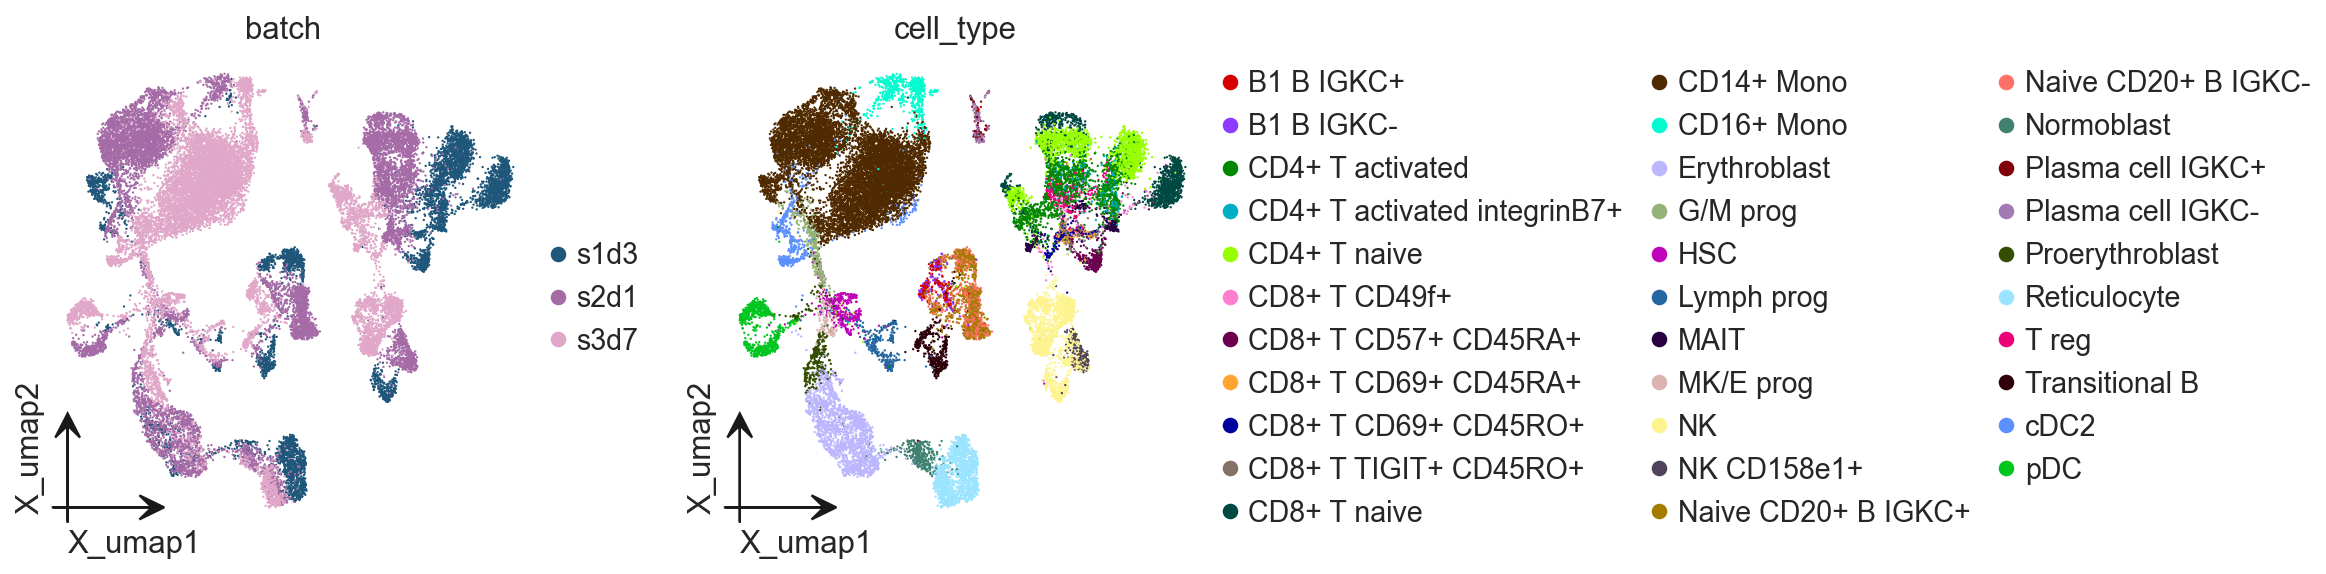

In [13]:
embeddings = manager.get_embeddings(
    adata,pre_normalized="T",  # True - data already normalized
    input_type="singlecell"
)

adata.obsm['X_scfoundation'] = embeddings

sc.pp.neighbors(adata, use_rep='X_scfoundation')
sc.tl.umap(adata)
ov.pl.embedding(
    adata, 
    basis='X_umap',
    color=['batch', 'cell_type']
)

## Fine-tuning for cell type annotation

Fine-tune scFoundation on a reference dataset with known cell type labels. The fine-tuning process adapts the pre-trained model to recognize specific cell types in your data.

In [8]:
reference_adata=adata[adata.obs['batch']=='s1d3']

In [9]:
reference_adata.obs['celltype']=reference_adata.obs['cell_type'].copy()

In [12]:
fine_tune_results = manager.model.fine_tune(
    train_adata=reference_adata,
    epochs=5,
    batch_size=32,
    pre_normalized="T",
    lr=1e-3,
    frozen_more=True  
)

[Fine-tuning] Starting scFoundation fine-tuning for annotation
[ℹ️Info] Found 30 cell types
[Preprocessing] Preprocessing data for scFoundation
[ℹ️Info] Input: (5935, 3000), Type: singlecell
[Preprocessing] Filtering genes to match scFoundation gene set
[Loaded] Gene matching: 2553 matched, 16711 padded
[ℹ️Info] Data already normalized and log-transformed
[Loaded] Added total count info (mean: 979.04)
[Loaded] Preprocessing completed: (5935, 19264)
[ℹ️Info] Token and position embeddings frozen
[ℹ️Info] Unfrozen encoder layer: self_attn.in_proj_weight
[ℹ️Info] Unfrozen encoder layer: self_attn.in_proj_bias
[ℹ️Info] Unfrozen encoder layer: self_attn.out_proj.weight
[ℹ️Info] Unfrozen encoder layer: self_attn.out_proj.bias
[ℹ️Info] Unfrozen encoder layer: linear1.weight
[ℹ️Info] Unfrozen encoder layer: linear1.bias
[ℹ️Info] Unfrozen encoder layer: linear2.weight
[ℹ️Info] Unfrozen encoder layer: linear2.bias
[ℹ️Info] Unfrozen encoder layer: norm1.weight
[ℹ️Info] Unfrozen encoder layer: norm

[Loaded] Best model loaded: accuracy=0.8706
[✅Complete] Fine-tuning completed


### Batch integration with fine-tuned model

After fine-tuning, we perform batch integration to remove technical variations while preserving biological differences. This critical step ensures that cells from different batches can be properly compared and analyzed together.

In [13]:
results = manager.model.predict(
    adata,
    task="integration",
    batch_key="batch",
    correction_method="mnn",
    pre_normalized="T",
)
adata.obsm['X_scfoundation_fine'] = results['embeddings']

[Preprocessing] Preprocessing data for scFoundation
[ℹ️Info] Input: (27423, 3000), Type: singlecell
[Preprocessing] Filtering genes to match scFoundation gene set
[Loaded] Gene matching: 2553 matched, 16711 padded
[ℹ️Info] Data already normalized and log-transformed
[Loaded] Added total count info (mean: 1055.64)
[Loaded] Preprocessing completed: (27423, 19264)
[Integrating] Starting scFoundation batch integration
[ℹ️Info] Batch key: 'batch', Method: 'mnn'
[ℹ️Info] Found 3 batches
[Embedding] Extracting scFoundation embeddings
    [Embedding] Generating cell embeddings...
    Data shape: (27423, 19264)
    [Preprocessing] Processing cells...


    Generated embeddings: (27423, 3072)
[Loaded] Embeddings: (27423, 3072)
[Preprocessing] Applying MNN correction
[Loaded] Integration completed using mnn


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:32)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:20)


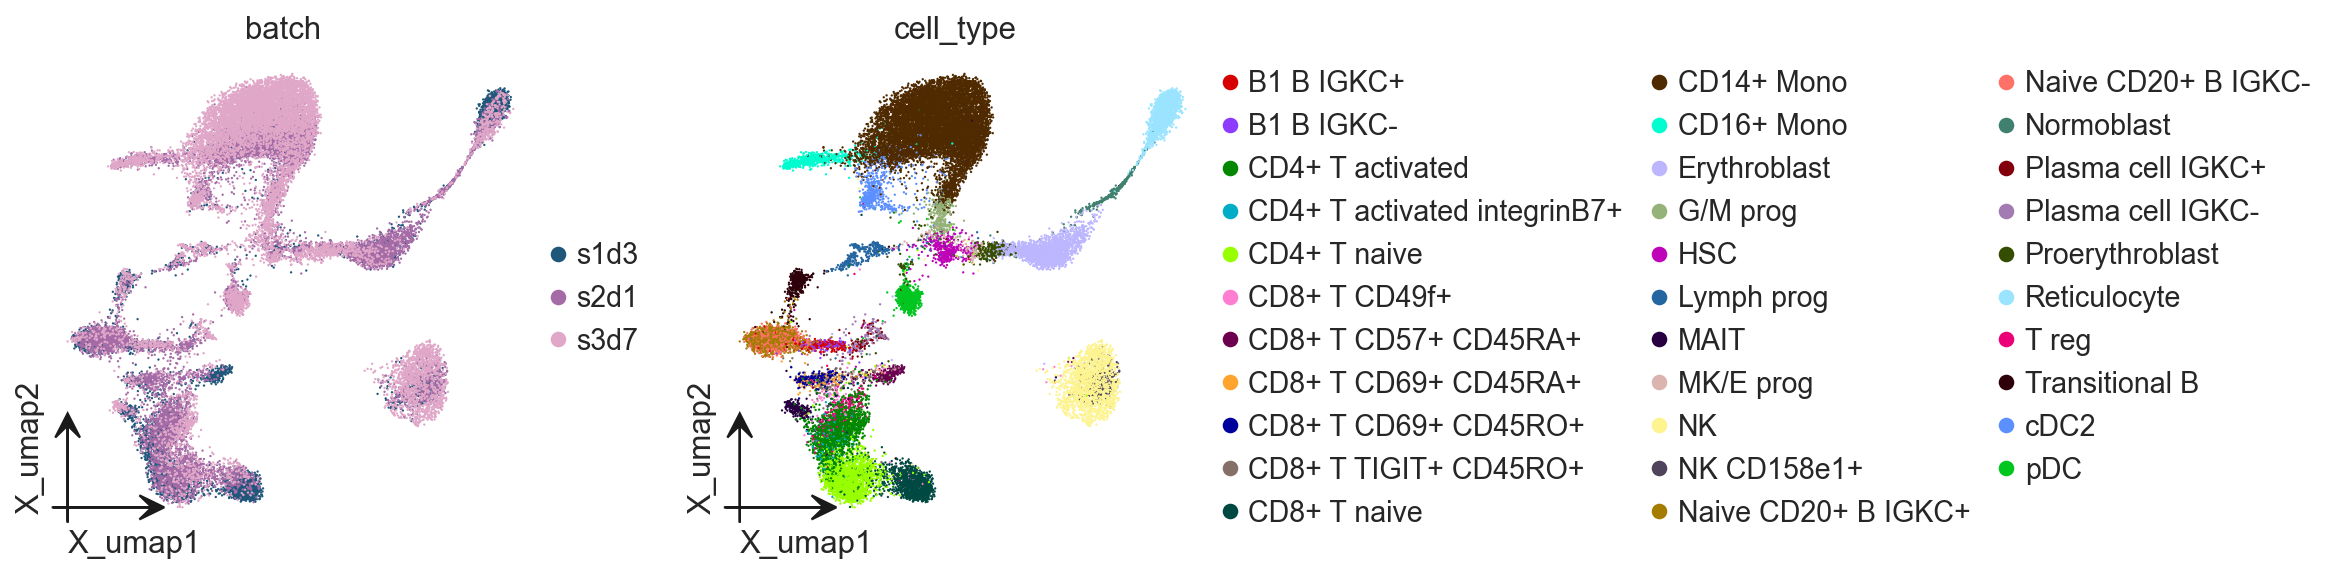

In [14]:
sc.pp.neighbors(adata, use_rep='X_scfoundation_fine')
sc.tl.umap(adata)
ov.pl.embedding(
    adata, 
    basis='X_umap',
    color=['batch', 'cell_type']
)

### Cell type annotation with fine-tuned model

The fine-tuned GeneFormer model can now predict cell types for all cells in the dataset, including those from batches not used in training. This demonstrates the model's ability to generalize learned patterns to new data while leveraging the improved discrimination capability gained through fine-tuning.

In [15]:
results_anno = manager.model.predict(
    adata,
    task="annotation",
    pre_normalized="T",
)

[Preprocessing] Preprocessing data for scFoundation
[ℹ️Info] Input: (27423, 3000), Type: singlecell
[Preprocessing] Filtering genes to match scFoundation gene set
[Loaded] Gene matching: 2553 matched, 16711 padded
[ℹ️Info] Data already normalized and log-transformed
[Loaded] Added total count info (mean: 1055.64)
[Loaded] Preprocessing completed: (27423, 19264)
    [Predicting] Using fine-tuned model for annotation...
[Predicting] Predicting cell types using scFoundation
[Preprocessing] Preprocessing data for scFoundation
[ℹ️Info] Input: (27423, 19264), Type: singlecell
[Preprocessing] Filtering genes to match scFoundation gene set
[Loaded] Gene matching: 19264 matched, 0 padded
[ℹ️Info] Data already normalized and log-transformed
[Loaded] Added total count info (mean: 1055.64)
[Loaded] Preprocessing completed: (27423, 19264)
[Loaded] PredictionDataset: 27423 samples
    Expression shape: torch.Size([27423, 19264])
[Loaded] Predicted cell types for 27423 cells
[ℹ️Info] Prediction summa

In [16]:
adata.obs['predicted_celltype']=results_anno['predicted_celltypes']

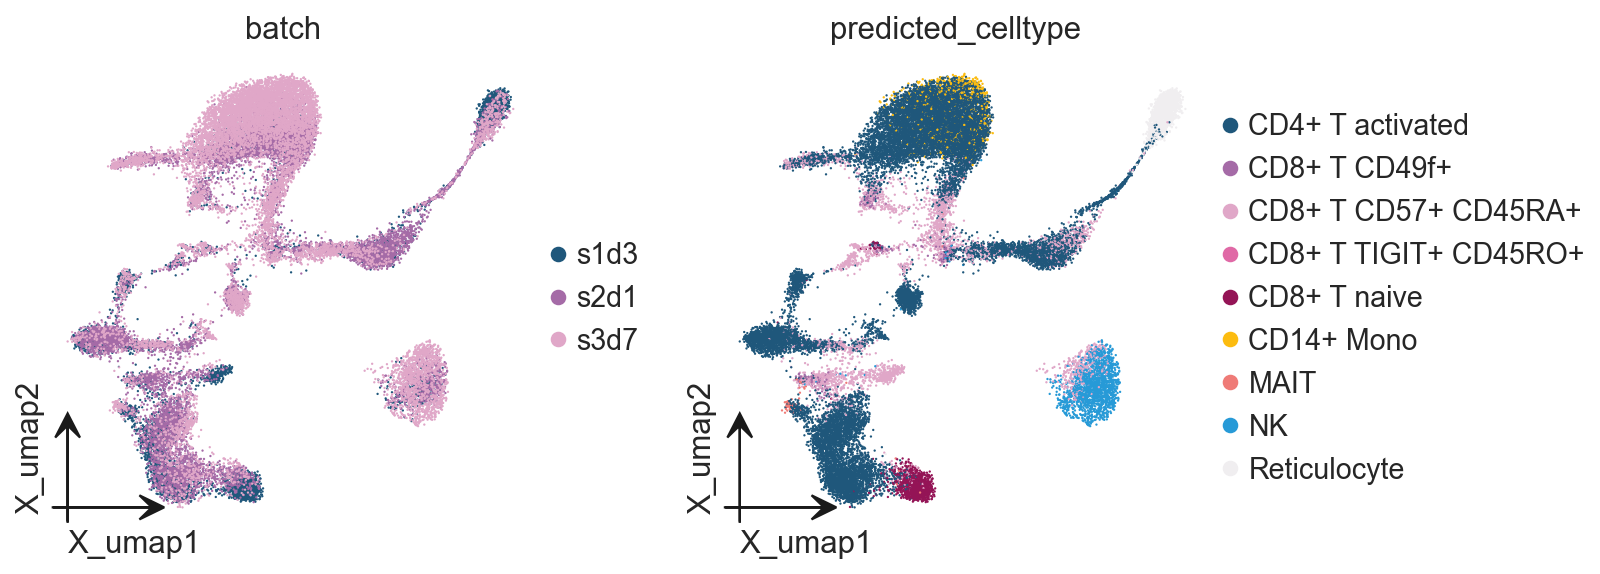

In [17]:
ov.pl.embedding(
    adata, 
    basis='X_umap',
    color=['batch', 'predicted_celltype']
)

### Transfer celltype information from fine_tune embedding

In [19]:
reference_adata.obsm['X_scfoundation_fine']=adata[adata.obs['batch']=='s1d3'].obsm['X_scfoundation_fine']

In [20]:
knn_transformer=ov.utils.weighted_knn_trainer(
    train_adata=reference_adata,
    train_adata_emb='X_scfoundation_fine',
    n_neighbors=15,
)

Weighted KNN with n_neighbors = 15 ... 

In [22]:
labels,uncert=ov.utils.weighted_knn_transfer(
    query_adata=adata,
    query_adata_emb='X_scfoundation_fine',
    label_keys='cell_type',
    knn_model=knn_transformer,
    ref_adata_obs=reference_adata.obs,
)

finished!


In [23]:
adata.obs["transf_celltype"]=labels.loc[adata.obs.index,"cell_type"]
adata.obs["transf_celltype_unc"]=uncert.loc[adata.obs.index,"cell_type"]

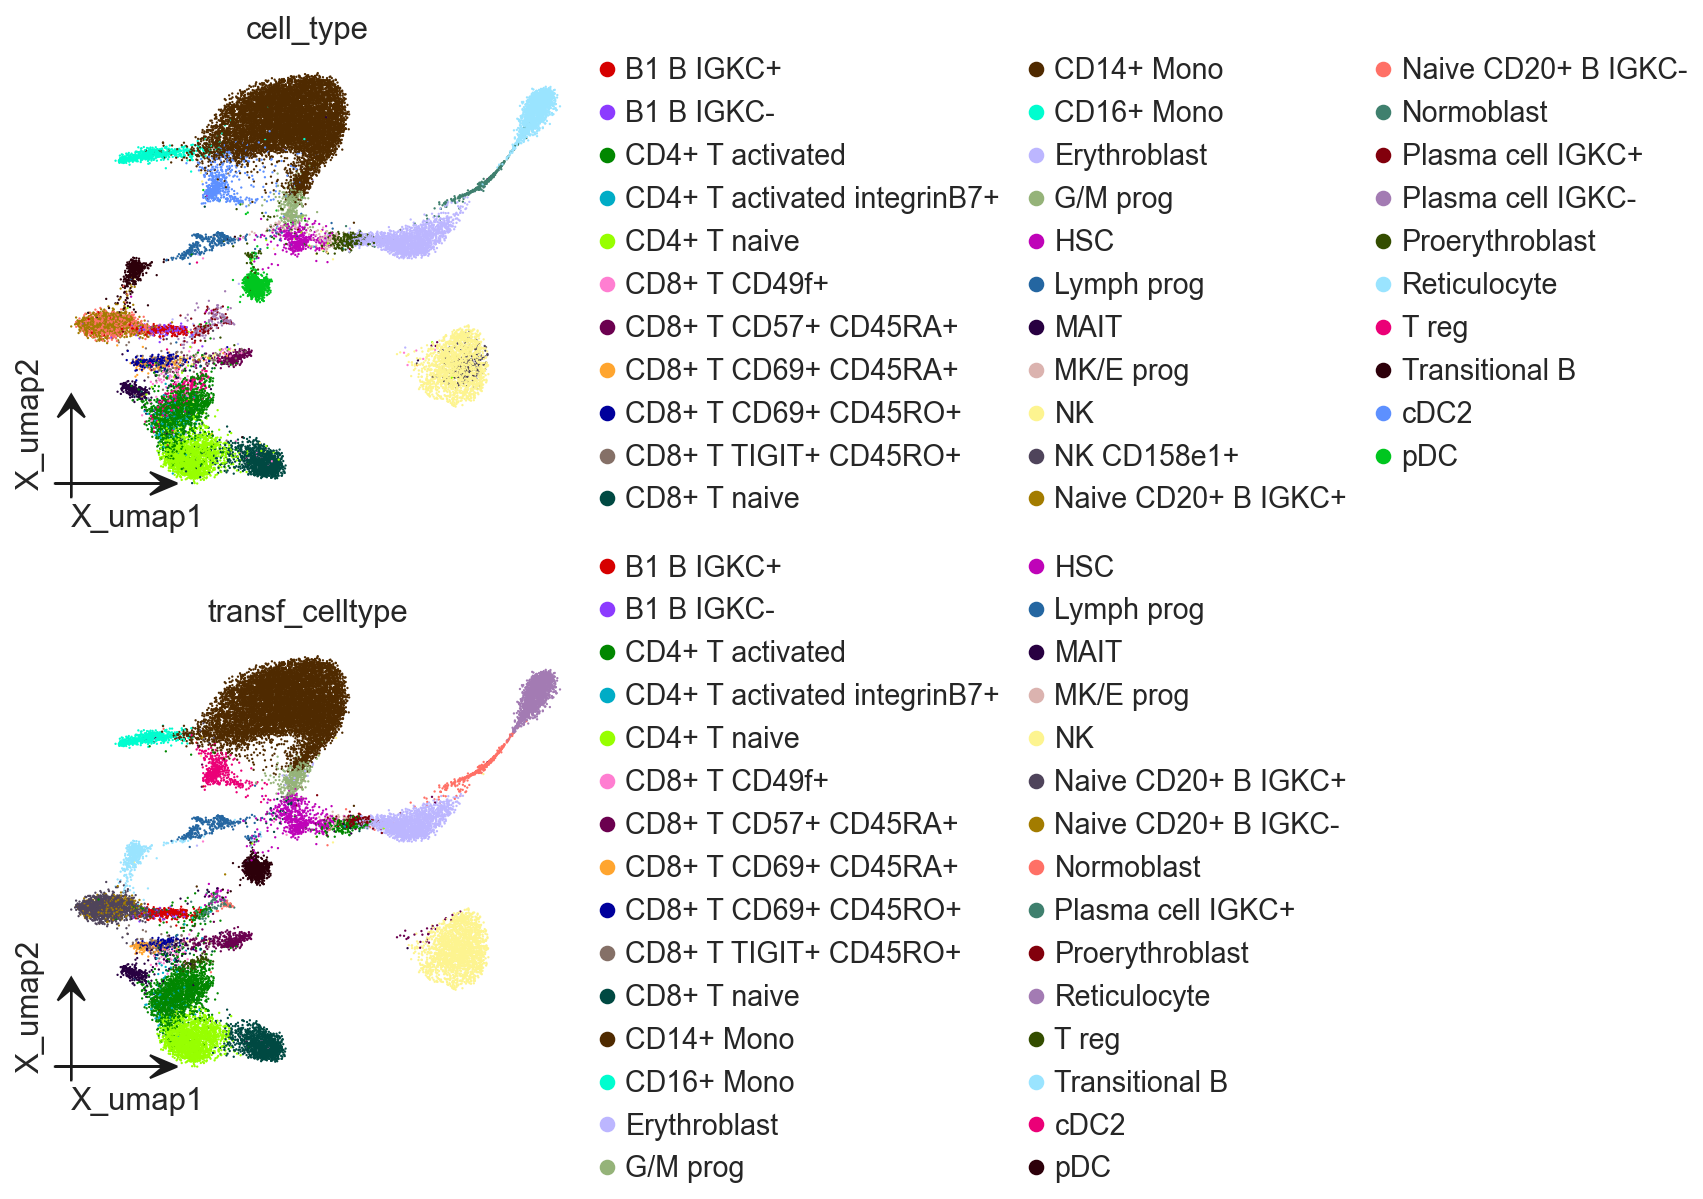

In [26]:
ov.pl.embedding(
    adata, 
    basis='X_umap',
    color=['cell_type', 'transf_celltype'],
    ncols=1,
)